In [1]:
#@title modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [16]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.4f}'.format

In [4]:
# Load the datasets from the internet
train_df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')
test_df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv')

In [7]:
train_df.shape, test_df.shape

((17000, 9), (3000, 9))

In [8]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3100,34.1900,15.0000,5612.0000,1283.0000,1015.0000,472.0000,1.4936,66900.0000
1,-114.4700,34.4000,19.0000,7650.0000,1901.0000,1129.0000,463.0000,1.8200,80100.0000
2,-114.5600,33.6900,17.0000,720.0000,174.0000,333.0000,117.0000,1.6509,85700.0000
3,-114.5700,33.6400,14.0000,1501.0000,337.0000,515.0000,226.0000,3.1917,73400.0000
4,-114.5700,33.5700,20.0000,1454.0000,326.0000,624.0000,262.0000,1.9250,65500.0000


In [9]:
scale_factor = 1000.0

In [11]:
train_df['median_house_value'] /= scale_factor # Scale the training set's label
test_df["median_house_value"] /= scale_factor # Scale the test set's label

In [15]:
pd.options.display.float_format = '{:.1f}'.format
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [30]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
    model = tf.keras.models.Sequential()
    
    # Add one linear layer to the model to yield a simple linear regressor.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

In [23]:
def train_model(model, df, feature, label, my_epochs, my_batch_size=None, my_validation_split=0.1):
    history = model.fit(x=df[feature], 
                        y=df[label], 
                        epochs=my_epochs, 
                        batch_size=my_batch_size,
                       validation_split=my_validation_split)
    
    # Gather the model's trained weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch
    
    # Isolate the root mean squared error for each epoch.
    hist = pd.DataFrame(history.history)
    rmse = hist['root_mean_squared_error']
    
    return epochs, rmse, history.history

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [40]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error')
    
    plt.plot(epochs[1:], mae_training[1:], label='Training Loss')
    plt.plot(epochs[1:], mae_validation[1:], label='Validation Loss')
    
    # We're not going to plot the first epoch, since the loss on the first epoch
    # is often substantially greater than the loss for other epochs.
    merged_mae_lists = mae_training[1:] + mae_validation[1:]
    highest_loss = max(merged_mae_lists)
    lowest_loss = min(merged_mae_lists)
    delta = highest_loss - lowest_loss
    print(delta)
    
    top_of_y_axis = highest_loss + (delta * 0.05)
    bottom_of_y_axis = lowest_loss - (delta * 0.05)
    
    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.show()
    
print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/30
136/136 [==============================] - 1s 4ms/step - loss: 40295.1875 - root_mean_squared_error: 200.7366 - val_loss: 48816.7539 - val_root_mean_squared_error: 220.9451
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 23321.9668 - root_mean_squared_error: 152.7153 - val_loss: 28702.5410 - val_root_mean_squared_error: 169.4182
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 12382.7402 - root_mean_squared_error: 111.2778 - val_loss: 15490.6387 - val_root_mean_squared_error: 124.4614
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 7300.0928 - root_mean_squared_error: 85.4406 - val_loss: 9658.5410 - val_root_mean_squared_error: 98.2779
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 6516.0117 - root_mean_squared_error: 80.7218 - val_loss: 9211.8369 - val_root_mean_squared_error: 95.9783
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 6512.4390 - ro

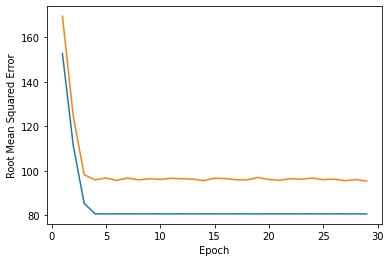

In [42]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

85.00994873046875


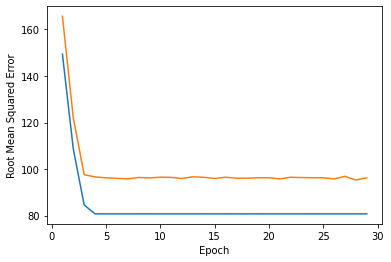

In [41]:
plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])